<a href="https://colab.research.google.com/github/BhavaniKumarPoleboina/Fake_news/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Data Science Task 1**

**Task**: Detecting Fake News

**Objective**: Differentiate between real and fake news using a Python project applying a PassiveAggressiveClassifier.

**Tasks**:
1. Read and explore the textual dataset.
2. Build a machine learning model with TfidfVectorizer and PassiveAggressiveClassifier.
3. Create a confusion matrix to evaluate the model's performance.
4. Measure the model's accuracy.

**Steps**:
1.  Import necessary libraries
2.  Read and explore the dataset
3.   Build a model using PassiveAggressiveClassifier
4.   Evaluate the model's accuracy









**Import necessary libraries**

In [4]:


import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

**Read and explore the dataset**

In [5]:
news_data= pd.read_csv("/content/news.csv")
news_data.head(10)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [6]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
news_data.shape

(6335, 4)

In [8]:
news_data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [9]:
labels= news_data.label
labels.head(5)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

**1st model**


3- Build the model

In [13]:
#First, we split the dataset into train & test samples:
x_train, x_test, y_train, y_test= train_test_split(news_data["text"], labels, test_size= 0.4, random_state= 7)

In [14]:
#Then we’ll initialize TfidfVectorizer with English stop words
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=vectorizer.fit_transform(x_train)
tfidf_test=vectorizer.transform(x_test)

In [15]:
#Create a PassiveAggressiveClassifier
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train,y_train)

y_pred=passive.predict(tfidf_test)

**4- Evaluate the model's accuracy**

In [16]:
#Create a confusion matrix
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix

array([[1181,   89],
       [  90, 1174]])

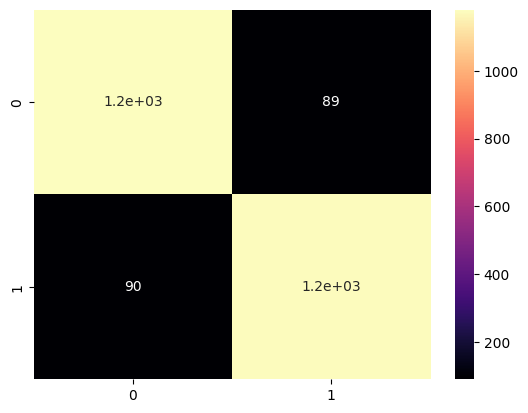

In [17]:
#Visualize the confusion matrix

sns.heatmap(matrix, annot=True, cmap='magma')  # 'magma' is just an example, you can choose any other colormap
plt.show()

In [18]:
#Calculate the model's accuracy
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

92.93606945540647

In [19]:
#The model's accuracy is 93.21%
Report= classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93      1270
        REAL       0.93      0.93      0.93      1264

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534



In [20]:
#Now let’s test this model.
#To test our trained model, I’ll first write down the title of any news item found on google news to see if our
#model predicts that the news is real or not:
news_headline_1 = "Trump takes on Cruz, but lightly"

data = vectorizer.transform([news_headline_1]).toarray()
print(passive.predict(data))

['REAL']


In [21]:
news_headline_2 = "Cow dung can cure Corona Virus"
data = vectorizer.transform([news_headline_2]).toarray()
print(passive.predict(data))

['FAKE']


In [22]:
news_headline_3 = "Doubt Congress will get ‘even 40 seats’ in LS polls, says Mamata"
data = vectorizer.transform([news_headline_3]).toarray()
print(passive.predict(data))

['REAL']


**2nd Model to Increase Accuracy**


3- Build the model


In [23]:
#First, we split the dataset into train & test samples:
x_train, x_test, y_train, y_test= train_test_split(news_data["text"], labels, test_size= 0.2, random_state= 7)

In [24]:
#Then we’ll initialize TfidfVectorizer with English stop words
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.9)
## fit and transform train set, transform test set
tfidf_train=vectorizer.fit_transform(x_train)
tfidf_test=vectorizer.transform(x_test)


In [25]:
#Create a PassiveAggressiveClassifier
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train,y_train)

y_pred=passive.predict(tfidf_test)


4.   Evaluate the model's accuracy



In [26]:
#Create a confusion matrix
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix


array([[589,  49],
       [ 43, 586]])

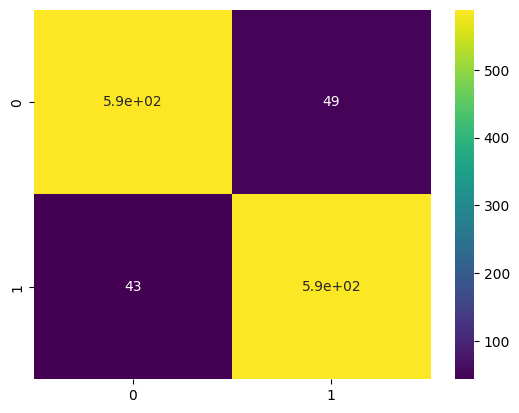

In [27]:
#Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap='viridis')  # 'viridis' is just an example, you can choose any other colormap
plt.show()



In [28]:
#Calculate the model's accuracy
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

92.73875295974744

In [29]:
#The model's accuracy is 93.21%
Report= classification_report(y_test, y_pred)
print(Report)


              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [30]:
#Now let’s test this model.
#To test our trained model, I’ll first write down the title of any news item found on google news to see if our
#model predicts that the news is real or not:news_headline_1 = "Trump takes on Cruz, but lightly"
news_headline_1 = "Trump takes on Cruz, but lightly"
data = vectorizer.transform([news_headline_1]).toarray()
print(passive.predict(data))

['REAL']


In [31]:
#Now I’m going to write a random fake news headline to see if the model predicts the news is fake or not:
news_headline_2 = "Cow dung can cure Corona Virus"
data = vectorizer.transform([news_headline_2]).toarray()
print(passive.predict(data))

['FAKE']


In [32]:
news_headline_3 = "Doubt Congress will get ‘even 40 seats’ in LS polls, says Mamata"
data = vectorizer.transform([news_headline_3]).toarray()
print(passive.predict(data))


['REAL']


**3rd Model to further increase accuracy**


3.  Build the model




In [33]:
#First, we split the dataset into train & test samples:
x_train,x_test,y_train,y_test=train_test_split(news_data['text'], labels, test_size=0.3, random_state=6)


In [34]:
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.9)
## fit and transform train set, transform test set
tfidf_train=vectorizer.fit_transform(x_train)
tfidf_test=vectorizer.transform(x_test)


In [35]:
#Create a PassiveAggressiveClassifier
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train,y_train)

y_pred=passive.predict(tfidf_test)

**4- Evaluate the model's accuracy**

In [36]:
#Create a confusion matrix
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix

array([[883,  58],
       [ 59, 901]])

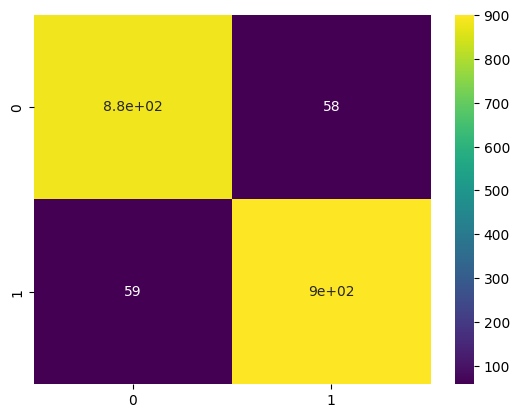

In [37]:
#Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap='viridis')  # 'viridis' is just an example, you can choose any other colormap
plt.show()

In [38]:

Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100


93.8453445554971

In [39]:

Report= classification_report(y_test, y_pred)
print(Report)


              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       941
        REAL       0.94      0.94      0.94       960

    accuracy                           0.94      1901
   macro avg       0.94      0.94      0.94      1901
weighted avg       0.94      0.94      0.94      1901



In [40]:
#Now let’s test this model.
#To test our trained model, I’ll first write down the title of any news item found on google news to see if our
#model predicts that the news is real or not:
news_headline_1 = "Trump takes on Cruz, but lightly"

data = vectorizer.transform([news_headline_1]).toarray()
print(passive.predict(data))


['REAL']


In [41]:
#Now I’m going to write a random fake news headline to see if the model predicts the news is fake or not:
news_headline_2 = "Cow dung can cure Corona Virus"
data = vectorizer.transform([news_headline_2]).toarray()
print(passive.predict(data))

['FAKE']


In [42]:
news_headline_3 = "Doubt Congress will get ‘even 40 seats’ in LS polls, says Mamata"
data = vectorizer.transform([news_headline_3]).toarray()
print(passive.predict(data))

['REAL']


**4nd Model to Increase Accuracy**

**3- Build the model**

In [43]:
#First, we split the dataset into train & test samples:
x_train,x_test,y_train,y_test=train_test_split(news_data['text'], labels, test_size=0.2, random_state=10)

In [44]:
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.9)
## fit and transform train set, transform test set
tfidf_train=vectorizer.fit_transform(x_train)
tfidf_test=vectorizer.transform(x_test)

In [45]:
#Create a PassiveAggressiveClassifier
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train,y_train)

y_pred=passive.predict(tfidf_test)



**4- Evaluate the model's accuracy**

In [46]:
#Create a confusion matrix
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix

array([[574,  29],
       [ 40, 624]])

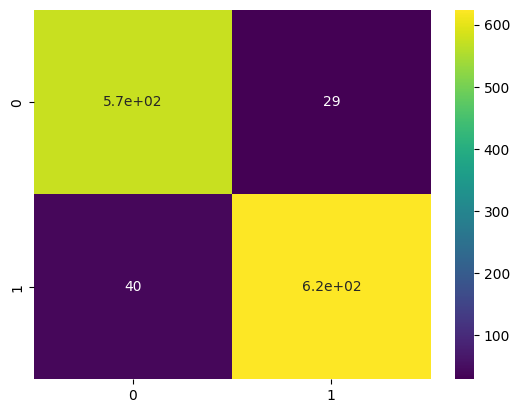

In [47]:
#Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap='viridis')  # 'viridis' is just an example, you can choose any other colormap
plt.show()

In [48]:
#Calculate the model's accuracy
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100


94.55406471981057

In [49]:
#the model's accuracy is 94.55%
Report= classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.95      0.94       603
        REAL       0.96      0.94      0.95       664

    accuracy                           0.95      1267
   macro avg       0.95      0.95      0.95      1267
weighted avg       0.95      0.95      0.95      1267



In [50]:
#Now let’s test this model.
#To test our trained model, I’ll first write down the title of any news item found on google news to see if our
#model predicts that the news is real or not:
news_headline_1 = "Trump takes on Cruz, but lightly"

data = vectorizer.transform([news_headline_1]).toarray()
print(passive.predict(data))

['REAL']


In [51]:
#Now I’m going to write a random fake news headline to see if the model predicts the news is fake or not:
news_headline_2 = "Cow dung can cure Corona Virus"
data = vectorizer.transform([news_headline_2]).toarray()
print(passive.predict(data))


['FAKE']


In [52]:
news_headline_3 = "Doubt Congress will get ‘even 40 seats’ in LS polls, says Mamata"
data = vectorizer.transform([news_headline_3]).toarray()
print(passive.predict(data))

['REAL']
